In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../data/yulu_rental.csv')

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. Аналізуємо залежність кількості орендованих велосипедів від швидкості вітру, звертаючи крім  того увагу на погоду.
   Очевидно, що кільксть орендованих велосипедів збільшується при гарній погоді та мінімальному вітрі. Навіть при збільшенню вітру, але при наявності гарної погоди (1), оренда залишається активною.
   Рекомендація: При збільшенні поривів вітру та погіршенні погодних умов, зменшується кількість орендованих велосипедів. В принципі динаміка зрозуміла. Можна пропонувати клієнтам спеціальних одяг, як захист від вітру, щоб збільшити при гірших погодних умовах попит на оренду велосипедів.

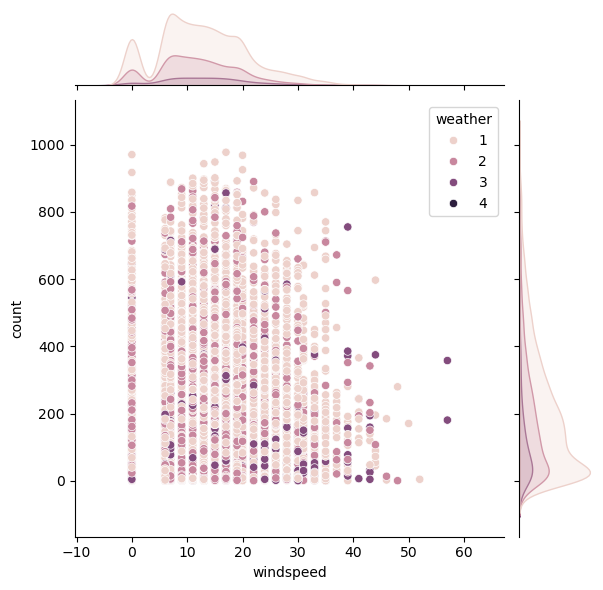

In [92]:
sns.jointplot(data = df, x = 'windspeed', y = 'count', hue= 'weather');

2. Дослідимо активність зареєстрованих та звичайних користувачів залежно від години дня. З графіку видно, що звичайні користувачі мають більш плавну динаміку на протязі доби, натомість зареєстровані користувачі мають піжвищену активінсть зранку, з 6 до 10, та ближче до вечора, з 16 до 20. Скоріш за все, це повязано з тим, що зареєстровані користувачі використовують орендовані велосипеди для того, щоб добратися до роботи або навчання, та повернутися додому.
   При покращенні програми лояльності клієнтів та залученні більше клієнтів до клієнтської бази, ймовірно збільшити кількість орендованих велосипедів.

In [124]:
df['datetime'] = pd.to_datetime(df.datetime)

In [126]:
df['hour'] = df.datetime.dt.hour

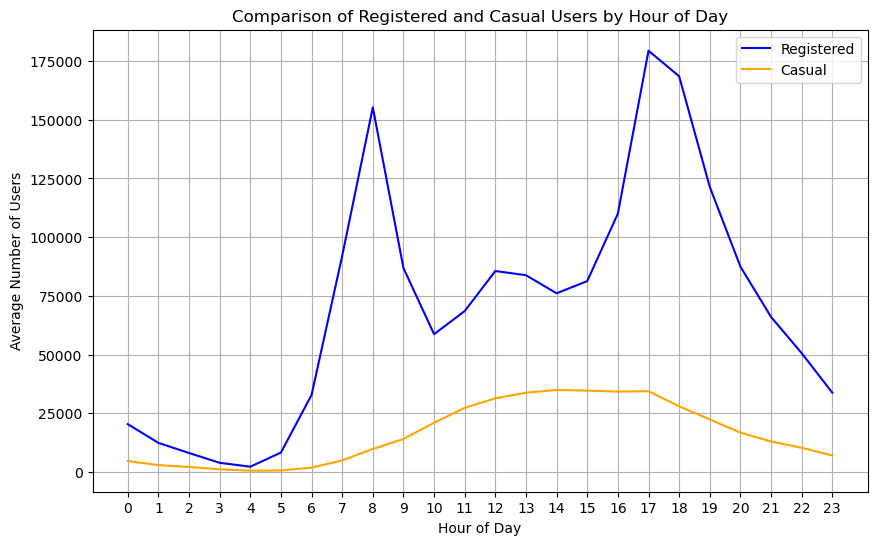

In [128]:
hourly_users = df.groupby('hour')[['registered', 'casual']].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='registered', data=hourly_users, label='Registered', color='blue')
sns.lineplot(x='hour', y='casual', data=hourly_users, label='Casual', color='orange')
plt.title('Comparison of Registered and Casual Users by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Users')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.show()

3. Дослідимо залежність кількості орендованих велосипедів від температури повітря. Очевидно, що температура від 8 до 17 градусів - є найбільш ідеальною для бізнесу. При збільшенні температури, кількість орендованих велосипедів знижується і зовсім падає пр надто високій температурі, більше 33.
   Як варіант, можна запровадити певну систему лояльності до клієнтів при підвищенні температури повітря, щоб збільшити кількість орендованих велосипедів. Або проводити більше рекламних компаній чи організації спільних велопрогулок.

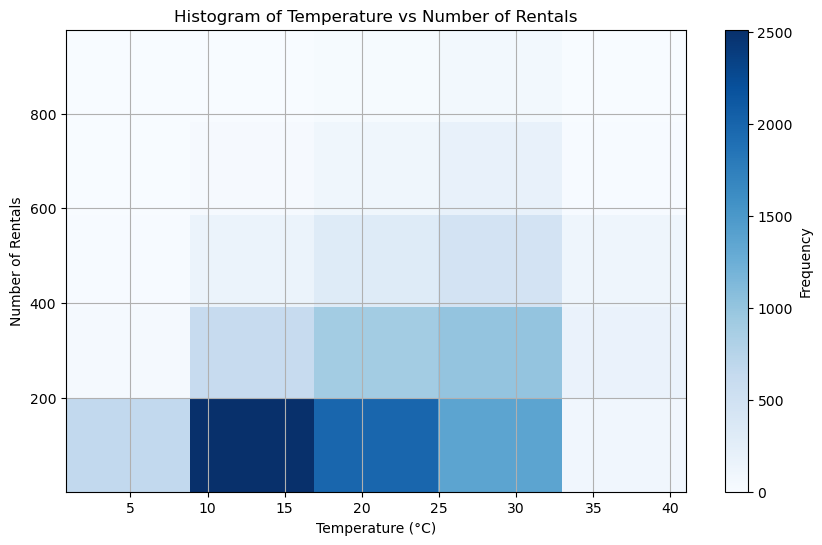

In [184]:
plt.figure(figsize=(10, 6))
plt.hist2d(data = df, x ='temp', y = 'count', bins = 5, cmap = 'Blues')
plt.colorbar(label='Frequency')
plt.title('Histogram of Temperature vs Number of Rentals')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()